In [1]:
!pip3 install category_encoders

     |████████████████████████████████| 81kB 3.3MB/s 


РК1, Желанкина Анна (ИУ5-22М), вариант 3


In [2]:
import numpy as np
import pandas as pd

from category_encoders.woe import WOEEncoder as ce_WOEEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/coil-mld/analysis.data'
data = pd.read_csv(url_data, header=None)
data.columns = ['season', 'river_size', 'fluid_elocity', 
                'chem_concentrations_1', 'chem_concentrations_2', 'chem_concentrations_3', 'chem_concentrations_4',
                'chem_concentrations_5', 'chem_concentrations_6', 'chem_concentrations_7', 'chem_concentrations_8',
                'algae_1', 'algae_2', 'algae_3', 'algae_4', 'algae_5', 'algae_6', 'algae_7']
data.head()

,season,river_size,fluid_elocity,chem_concentrations_1,chem_concentrations_2,chem_concentrations_3,chem_concentrations_4,chem_concentrations_5,chem_concentrations_6,chem_concentrations_7,chem_concentrations_8,algae_1,algae_2,algae_3,algae_4,algae_5,algae_6,algae_7
0,winter,small_,medium,8.00000,9.80000,60.80000,6.23800,578.00000,105.00000,170.00000,50.00000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small_,medium,8.35000,8.00000,57.75000,1.28800,370.00000,428.75000,558.75000,1.30000,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small_,medium,8.10000,11.40000,40.02000,5.33000,346.66699,125.66700,187.05701,15.60000,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small_,medium,8.07000,4.80000,77.36400,2.30200,98.18200,61.18200,138.70000,1.40000,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small_,medium,8.06000,9.00000,55.35000,10.41600,233.70000,58.22200,97.58000,10.50000,9.2,2.9,7.5,0.0,7.5,4.1,1.0


In [4]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('season', ('object', 0)),
 ('river_size', ('object', 0)),
 ('fluid_elocity', ('object', 0)),
 ('chem_concentrations_1', ('object', 0)),
 ('chem_concentrations_2', ('object', 0)),
 ('chem_concentrations_3', ('object', 0)),
 ('chem_concentrations_4', ('object', 0)),
 ('chem_concentrations_5', ('object', 0)),
 ('chem_concentrations_6', ('object', 0)),
 ('chem_concentrations_7', ('object', 0)),
 ('chem_concentrations_8', ('object', 0)),
 ('algae_1', ('float64', 0)),
 ('algae_2', ('float64', 0)),
 ('algae_3', ('float64', 0)),
 ('algae_4', ('float64', 0)),
 ('algae_5', ('float64', 0)),
 ('algae_6', ('float64', 0)),
 ('algae_7', ('float64', 17))]

In [5]:
data['fluid_elocity'].unique()

array(['medium', 'high__', 'low___'], dtype=object)

In [6]:
trgt = []
for i, val in enumerate(data['fluid_elocity']):
    if (val == 'medium' or val == 'high__'):
        trgt.append(1)
    else:
        trgt.append(0)

trgt = pd.Series(trgt)
data['target'] = trgt

Задача № 3.
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "weight of evidence (WoE) encoding".

In [7]:
ce_WOEEncoder1 = ce_WOEEncoder()
data_WOE_ENC = ce_WOEEncoder1.fit_transform(data[data.columns.difference(['target'])], data['target'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [8]:
data_WOE_ENC

,algae_1,algae_2,algae_3,algae_4,algae_5,algae_6,algae_7,chem_concentrations_1,chem_concentrations_2,chem_concentrations_3,chem_concentrations_4,chem_concentrations_5,chem_concentrations_6,chem_concentrations_7,chem_concentrations_8,fluid_elocity,river_size,season
0,0.0,0.0,0.0,0.0,34.2,8.3,0.0,0.371359,0.622674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.856266,1.994982,-0.002154
1,1.4,7.6,4.8,1.9,6.7,0.0,2.1,0.000000,0.000000,-1.574551,0.000000,0.000000,0.000000,0.000000,-0.188256,2.856266,1.994982,0.056866
2,3.3,53.6,1.9,0.0,0.0,0.0,9.7,0.297252,-0.475938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.856266,1.994982,-0.275268
3,3.1,41.0,18.9,0.0,1.4,0.0,1.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.475938,2.856266,1.994982,0.056866
4,9.2,2.9,7.5,0.0,7.5,4.1,1.0,-1.574551,0.034887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.856266,1.994982,-0.275268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,12.7,21.7,5.6,0.0,1.0,0.0,0.0,-1.014935,-0.188256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.856266,-1.097627,-0.275268
196,18.0,7.0,1.7,0.0,4.8,10.3,1.0,0.371359,-0.881403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.856266,-1.097627,0.056866
197,0.0,15.9,2.4,1.0,0.0,0.0,0.0,-0.321788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.856266,-1.097627,-0.275268
198,0.0,12.5,3.7,1.0,0.0,0.0,4.9,0.371359,-0.475938,0.034887,-0.475938,-0.475938,-0.475938,-0.475938,0.990399,2.856266,-1.097627,-0.002154


In [9]:
data['season'].unique()

array(['winter', 'spring', 'autumn', 'summer'], dtype=object)

In [10]:
data_WOE_ENC['season'].unique()

array([-0.00215401,  0.05686617, -0.27526767,  0.00956945])

Задача №23.
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе правила трех сигм.

In [11]:
def diagnostic_plots(df, variable, title='гистограмма'):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    fig.suptitle(title)
    plt.show()

In [22]:
#data['chem_concentrations_1']
K1 = 3
lower_boundary = data['algae_6'].mean() - (K1 * data['algae_6'].std())
upper_boundary = data['algae_6'].mean() + (K1 * data['algae_6'].std())

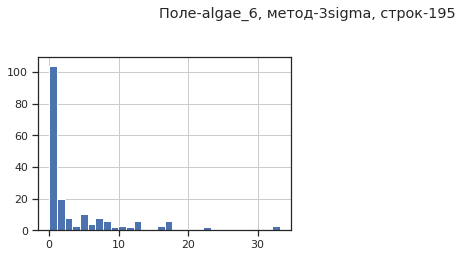

In [23]:
# Флаги для удаления выбросов
outliers_temp = np.where(data['algae_6'] > upper_boundary, True, 
                        np.where(data['algae_6'] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data.loc[~(outliers_temp), ]  
title = 'Поле-{}, метод-{}, строк-{}'.format('algae_6', '3sigma', data_trimmed.shape[0])
diagnostic_plots(data_trimmed, 'algae_6', title)